#Index - 190494A
#Name - Ranasinghe K K H

#1

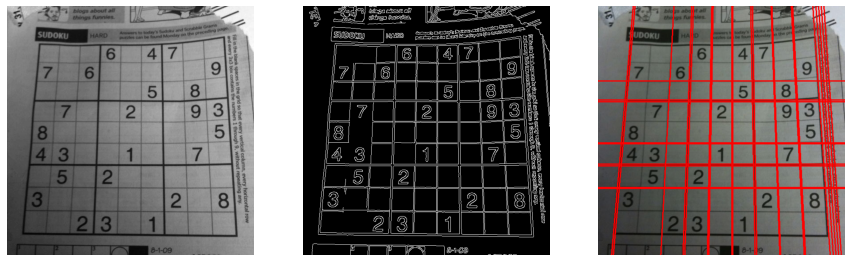

In [19]:
import matplotlib.pyplot as plt
import cv2 as cv

im = cv.imread("sudoku.png", cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:

    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0 +1000*(-b)), int(y0+ 1000*(a))
    x2, y2 = int(x0 -1000*(-b)), int(y0- 1000*(a))
    cv.line(im, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1,3,figsize = (15,12) )
ax[0].imshow(gray, cmap ='gray')
ax[0].axis('off')
edges = cv.cvtColor(edges,cv.COLOR_BGR2RGB)
ax[1].imshow(edges,cmap ='gray')
ax[1].axis('off')
im=cv.cvtColor(im,cv.COLOR_BGR2RGB)
ax[2].imshow(im)
ax[2].axis('off')

plt.show()

#2

(-0.5, 499.5, 347.5, -0.5)

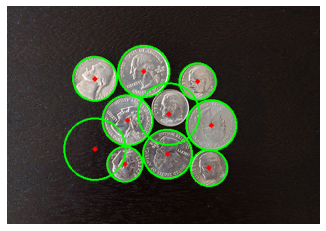

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im= cv.imread("coins.jpg",cv.IMREAD_COLOR)
assert im is not None
gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
circles=cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=150,param2=20,minRadius=20,maxRadius=50)
circles=np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)
fig, ax = plt.subplots()
im = cv.cvtColor(im,cv.COLOR_RGB2BGR)
ax.imshow(im)
ax.axis("off")

#3

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


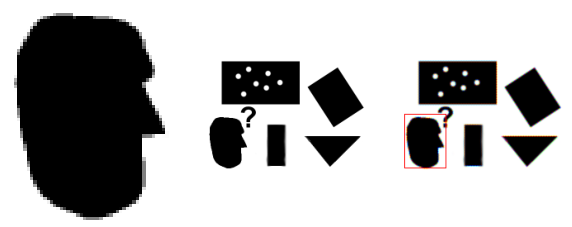

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv

im = cv.imread("pic1.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
templ = cv.imread("templ.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
assert templ is not None

im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x , y, scale, orientation, p1, p2))
    new = cv.rectangle(out, p1, p2, (0, 0,255))
    new = cv.cvtColor(new, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,3, figsize =(10,10) )
ax[0].imshow(templ, cmap = 'gray')
ax[0].axis('off')
ax[1].imshow(im, cmap = 'gray')
ax[1].axis('off')
ax[2].imshow(new, cmap = 'gray')
ax[2].axis('off')
plt.show()

#4

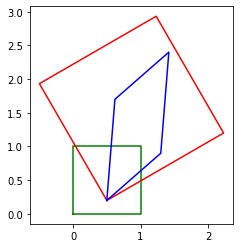

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

a,b,c,d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T

thera = np.pi*30/180
s=2
tx,ty = 0.5,0.2
H= np.array([[s*np.cos(thera),-s*np.sin(thera),tx],[s*np.sin(thera),s*np.cos(thera),ty],[0,0,1]])
Y = H@X
a11,a12,a21,a22=0.8,0.12,0.7,1.5
A=np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])
Y1=A @ X

x= np.append(X[0,:],X[0,0])
y=np.append(X[1,:],X[1,0])
fig,ax = plt.subplots()
ax.plot(x,y,color='g')
ax.set_aspect("equal")

x= np.append(Y[0,:],Y[0,0])
y=np.append(Y[1,:],Y[1,0])
ax.plot(x,y,color='r')
ax.set_aspect("equal")


x= np.append(Y1[0,:],Y1[0,0])
y=np.append(Y1[1,:],Y1[1,0])
ax.plot(x,y,color='b')
ax.set_aspect("equal")
plt.show()


#5

((-0.5, 799.5, 639.5, -0.5),
 (-0.5, 799.5, 639.5, -0.5),
 (-0.5, 799.5, 799.5, -0.5))

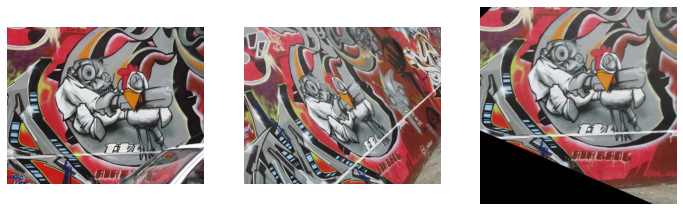

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread(r"./graf/img1.ppm",cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r"./graf/img4.ppm",cv.IMREAD_ANYCOLOR)
im1=cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im4=cv.cvtColor(im4,cv.COLOR_BGR2RGB)

H=np.array([[6.6378505e-01,   6.8003334e-01,  -3.1230335e+01],[-1.4495500e-01 ,  9.7128304e-01  , 1.4877420e+02],[4.2518504e-04 , -1.3930359e-05  , 1.0000000e+00]])


imlto4 = cv.warpPerspective(im4,np.linalg.inv(H),(800,800))

fig,ax =plt.subplots(1,3,figsize=(12,12))
ax[0].imshow(im1)
ax[1].imshow(im4)
ax[2].imshow(imlto4)
ax[0].axis('off'),ax[1].axis('off'),ax[2].axis('off')
